<H1>Filtering</H2>

In [59]:
%pylab inline
from scipy import signal
# check this https://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

Populating the interactive namespace from numpy and matplotlib


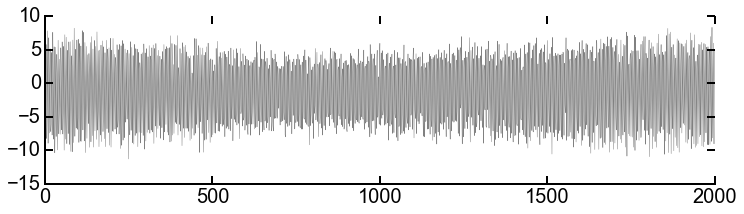

In [68]:
trace = np.loadtxt('LFP.txt') # 10 seconds at 200 Hz?
fs = 200 
#time = np.linspace(0, len(trace)/fs, 1/fs ,endpoint=0)
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)

ax.plot(trace, lw=.5, c='gray')

<H2>Low-pass butter filter</H2>

In [30]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    """
    Performs the low pass filtering of the data
    
    Arguments:
    
    data -- Numpy array with the trace
    cutoff -- frequency (e.g., 10 Hz)
    
    """
    nyq = 0.5* fs # Nysquid frequency
    normal_cutoff = cutoff/ nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    y = signal.lfilter(b,a, data)
    return(y)

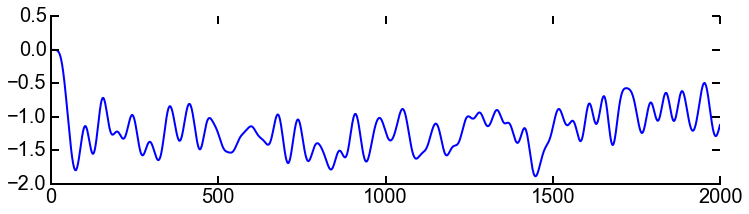

In [52]:
order = 8
fs = 1000 # sample rate 100 Hz
cutoff = 20


fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)

LFP = butter_lowpass_filter(trace, cutoff, fs, order)

#ax.plot(trace, lw=0.5)
ax.plot(LFP)

<H2>Down-sampling</H2>


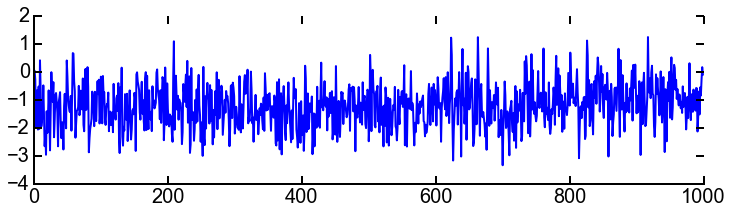

In [61]:
downsample = signal.decimate(trace,2)
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax.plot(downsample)
